Objetivo: Classificar uma máquina como defeituosa ou não utilizando o algoritmo de Machine Learning SVM 

In [1]:
#importando as bibliotecas
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Criando a base de dados
data = pd.DataFrame({
    "Potência":[120,80,100,110,90,130,70,105,115,85],
    "Eficiência":[92,65,75,85,68,95,60,80,88,70],
    "Idade":[3,8,5,4,7,2,10,6,3,9],
    "Tamanho":[50,45,55,60,48,62,40,58,56,47],
    "Consumo de Energia":['Eficiente', 'Ineficiente', 'Ineficiente','Eficiente', 'Ineficiente', 'Eficiente', 'Ineficiente', 'Eficiente', 'Eficiente', 'Ineficiente' ]
    })

In [3]:
#Separando a base de dados em treino e teste
X = data[['Potência','Eficiência','Idade', 'Tamanho']]
y = data['Consumo de Energia']

In [4]:
# Dividindo a base de dados em treino e teste
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,
                                                random_state=42)

In [5]:
# Criação do modelo de Machine Learning
modelo= SVC(kernel='linear')
modelo.fit(X_train,y_train)

SVC(kernel='linear')

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [6]:
# Fazendo predições
yprev = modelo.predict(X_test)

In [7]:
yprev

array(['Eficiente', 'Ineficiente', 'Eficiente'], dtype=object)

In [10]:
X_test

,Potência,Eficiência,Idade,Tamanho
8,115,88,3,56
1,80,65,8,45
5,130,95,2,62


In [9]:
data.head(20)

,Potência,Eficiência,Idade,Tamanho,Consumo de Energia
0,120,92,3,50,Eficiente
1,80,65,8,45,Ineficiente
2,100,75,5,55,Ineficiente
3,110,85,4,60,Eficiente
4,90,68,7,48,Ineficiente
5,130,95,2,62,Eficiente
6,70,60,10,40,Ineficiente
7,105,80,6,58,Eficiente
8,115,88,3,56,Eficiente
9,85,70,9,47,Ineficiente


In [11]:
# Calculo das métricas do algoritmo de Machine Learning
# Acurácia = VP+VN / Total(VP +FP+FN+VN)
acc = accuracy_score(yprev,y_test)
acc

1.0

In [12]:
# Classification report
cr=classification_report(yprev,y_test)
print(cr)

              precision    recall  f1-score   support

   Eficiente       1.00      1.00      1.00         2
 Ineficiente       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [13]:
# Matriz de confusão
cm = confusion_matrix(yprev,y_test)
print(cm)

[[2 0]
 [0 1]]


Text(50.72222222222221, 0.5, 'Real')

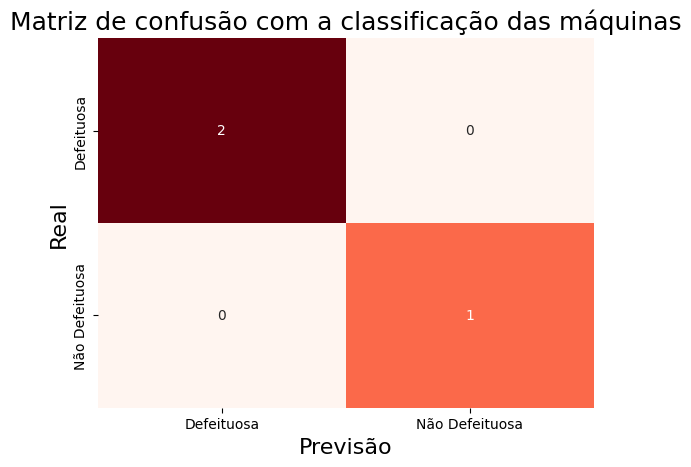

In [14]:
# Visualizando a matriz de confusão de forma grafica
sns.heatmap(cm,annot=True,cmap='Reds',cbar=False,
            xticklabels=['Defeituosa','Não Defeituosa'],
            yticklabels=['Defeituosa','Não Defeituosa']
)
plt.title('Matriz de confusão com a classificação das máquinas',fontsize=18)
plt.xlabel('Previsão',fontsize=16)
plt.ylabel('Real',fontsize=16)

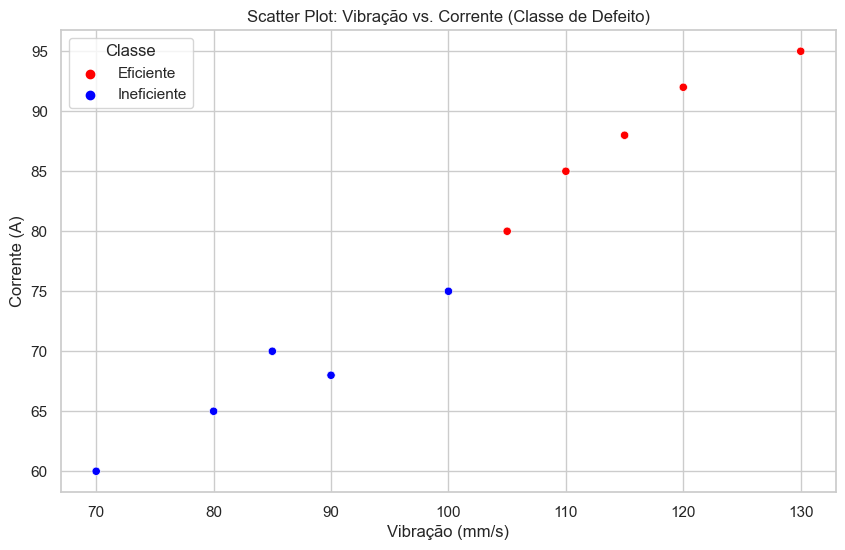

In [17]:
sns.set(style="whitegrid")
# Mapeando as cores com base na classe
palette = {"Eficiente": "red", "Ineficiente": "blue"}
# Criando o scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Potência', y='Eficiência', hue='Consumo de Energia', data=data, 
                palette= palette)

# Personalizando o gráfico
plt.title('Scatter Plot: Potência vs. Eficiência')
plt.xlabel('Vibração (mm/s)')
plt.ylabel('Corrente (A)')

# Mostrando o gráfico
plt.legend(title='Classe')
plt.show()